In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial
from unified_angular_acceptance import angsens_poly

In [2]:
plt.rcParams['figure.figsize'] = [12., 8.]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 14

Extra variations based on this presentation: https://docs.google.com/presentation/d/1F-efnj9qTicEfNZVwlY-7lgzwZa_WZRxnTAHRpURLgE/edit#slide=id.g6ad2758e86_0_38 to cover a larger space.

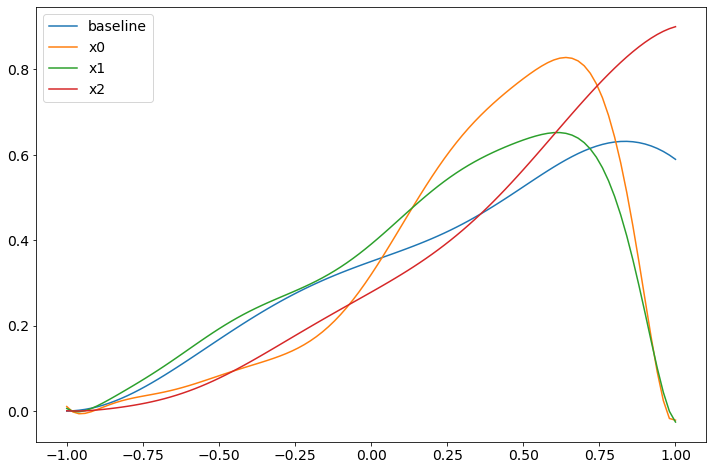

In [3]:
eta = np.linspace(-1,1,101)

def plot(p, name):
    coef = angsens_poly(p)
    newf = polynomial.Polynomial(coef[1:])
    plt.plot(eta, newf(eta), label=name)    

# Values chosen "by hand"    
extra_sets = [[-1.3, 0.15], [-1., -0.1], [0.5, 0.15]]

plot([0.101569, -0.049344], 'baseline')
plot(extra_sets[0], 'x0')
plot(extra_sets[1], 'x1')
plot(extra_sets[2], 'x2')

plt.legend()
plt.savefig('extra_sets.png')

In [4]:
# write as files
for i in range(len(extra_sets)):
    with open('sys_models/as.extra_set%i_p0=%.2g_p1=%.2g'%(i, extra_sets[i][0], extra_sets[i][1]), 'w') as f:
        f.write('\n'.join([str(c) for c in angsens_poly(extra_sets[i])]))